In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# CSV 파일 로드
data = pd.read_csv('/content/drive/MyDrive/final2 (1).csv')

# 데이터 전처리: 필요한 열을 선택하고 데이터 정규화
data = data[['date', 'solar']]
scaler = MinMaxScaler()
data['solar'] = scaler.fit_transform(data['solar'].values.reshape(-1, 1))

data['date'] = pd.to_datetime(data['date'])

sequence_length = 10
X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data['solar'].iloc[i:i+sequence_length].values)
    y.append(data['solar'].iloc[i+sequence_length])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
335/335 [==============================] - 3s 10ms/step - loss: 0.0171 - val_loss: 0.0083
Epoch 2/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 3/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 4/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 5/100
335/335 [==============================] - 2s 7ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 6/100
335/335 [==============================] - 2s 6ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 7/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 8/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 9/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 10/100
335/335 [==============================] - 2s 5ms/step - loss: 0.0040 - val_l

In [ ]:
predicted_values = model.predict(X_test)

144/144 [==============================] - 1s 2ms/step


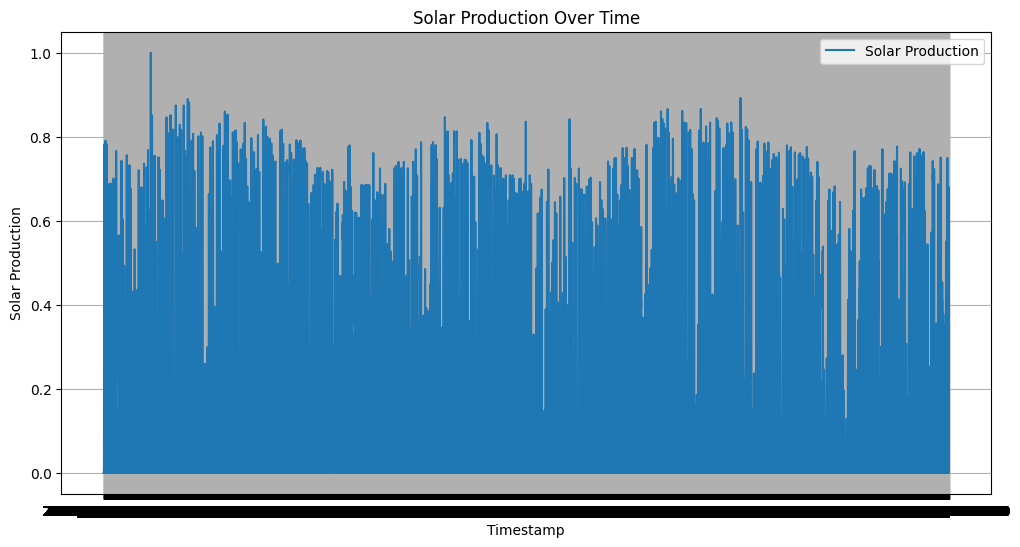

In [ ]:
import matplotlib.pyplot as plt

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['solar'], label='Solar Production')
plt.xlabel('Timestamp')
plt.ylabel('Solar Production')
plt.title('Solar Production Over Time')
plt.legend()
plt.grid(True)

plt.show()

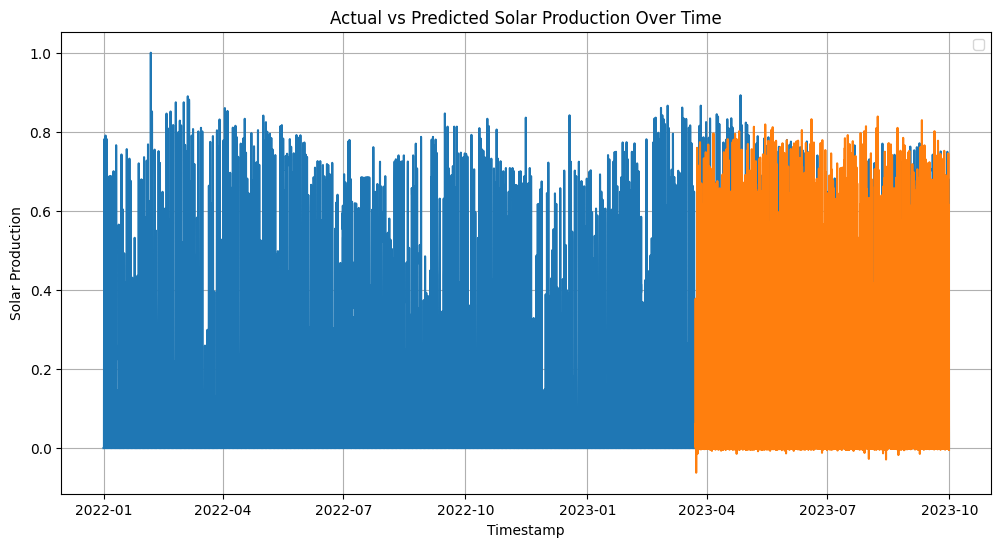

In [ ]:
import matplotlib.pyplot as plt

# 원래 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['solar'])

# 예측된 데이터 시각화
plt.plot(data['date'].iloc[-len(y_test):], predicted_values)

plt.xlabel('Timestamp')
plt.ylabel('Solar Production')
plt.title('Actual vs Predicted Solar Production Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 예측
predicted_values = model.predict(X_test)

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, predicted_values)
print(f"평균 제곱 오차(MSE): {mse}")

# 평균 절대 오차(Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, predicted_values)
print(f"평균 절대 오차(MAE): {mae}")


96/96 [==============================] - 0s 4ms/step
평균 제곱 오차(MSE): 0.0034808107239194595
평균 절대 오차(MAE): 0.030766868974123878


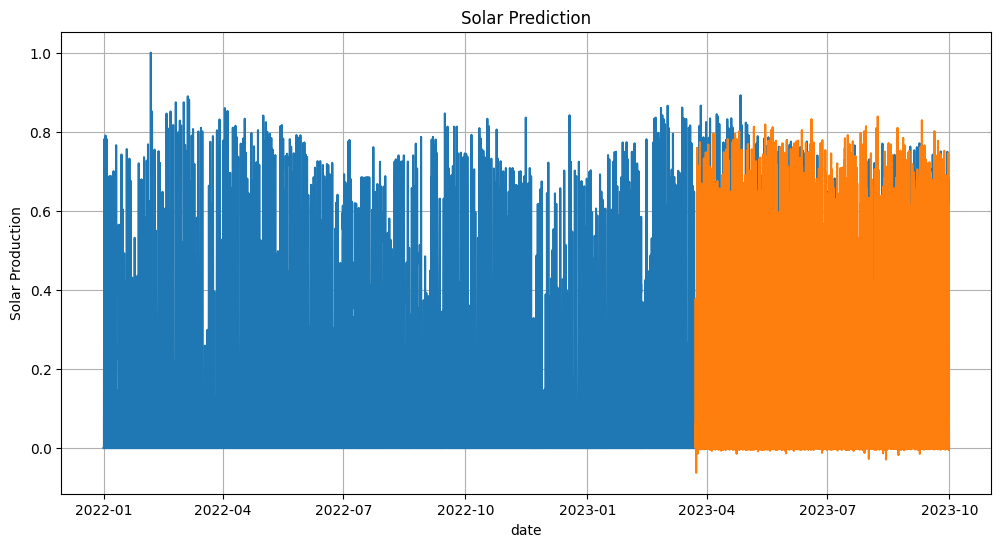

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 원래 데이터 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['solar'])

# 예측된 데이터 시각화
sns.lineplot(x=data['date'].iloc[-len(y_test):], y=predicted_values.flatten())

plt.xlabel('date')
plt.ylabel('Solar Production')
plt.title('Solar Prediction')
plt.grid(True)

plt.show()

In [ ]:
predicted_values = model.predict(X_test)

# 정규화된 데이터를 역 정규화
predicted_values_original_scale = scaler.inverse_transform(predicted_values)

144/144 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델 예측
predicted_values = model.predict(X_test)

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(y_test, predicted_values)
print(f"평균 제곱 오차(MSE): {mse}")

# 평균 절대 오차(Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, predicted_values)
print(f"평균 절대 오차(MAE): {mae}")


144/144 [==============================] - 0s 2ms/step
평균 제곱 오차(MSE): 0.0036779625406577116
평균 절대 오차(MAE): 0.03246354561927338


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])